## Uso de convoluciones

En esta práctica verás cómo mejorar la práctica 4.3 utilizando convoluciones. 

Junto con las convoluciones, utilizarás técnicas de Pooling, que permiten comprimir imágenes conservando sus características (features). 

## Limitaciones de las DNN

En la práctica 4.3 creaste una DNN con Keras para artículos de moda con el dataset Fashion de MNIST. Generaste un modelo con una certeza en la predicción muy alta pero con una restricción muy obvia. Las imagenes, tenían 28x28 píxeles, escala de grises y los elementos estaban centrados en la imagen.

Por ejemplo, estas:
![Imagen de un jersey y una bota](https://cdn-images-1.medium.com/max/1600/1*FekMt6abfFFAFzhQcnjxZg.png)

La DNN que creaste aprendió procesando los píxeles en crudo y aprendiendo las relaciones que hacen que esos píxeles formaran un jersey, o las relaciones que hacen que formara una bota. Pero, ¿cómo clasificaría esta imagen?

![imagen de bota](https://cdn.pixabay.com/photo/2013/09/12/19/57/boots-181744_1280.jpg)

Aunque está muy claro que hay unas botas en la imagen, el clasificador fallaría por muchas razones: 
* Primero, la imagen no mide 28x28 ni está en escala de grises.
* Segundo, el clasificador está entrenando con los píxeles en crudo mostrando la parte izquierda de la bota y no con las características que hacen que el objeto, sea una bota.

Las convoluciones son muy potentes. Una convolución es un filtro para procesar una imagen y extraer sus características que muestran algo en común en la imagen. 

Generar convoluciones es muy simple: simplemente escanea cada píxel de la imagen y luego mira los píxeles vecinos. Multiplica los valores de estos píxeles por los pesos equivalentes en un filtro.

Entonces, por ejemplo, fíjate esta imagen:

![image-2.png](attachment:image-2.png)

Se especifica una convolución de 3x3

El valor actual del pixel es 192, pero puedes calcular el nuevo valor mirando a los valores de los vecinos y multiplicándolos por los valores especificados en el filtro, para asignar el nuevo valor del pixel con la cantidad final

Exploremos cómo funcionan las convoluciones creando una convolución básica en una imagen en escala de grises 2D. Primero podemos cargar la imagen tomando la imagen de 'ascenso' de scipy. Es una bonita imagen integrada con muchos ángulos y líneas.

importamos algunas librerías de python.

In [9]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()


<ipython-input-9-f469e2b82770>:4: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  i = misc.ascent()


pintamos la imagen con pyplot

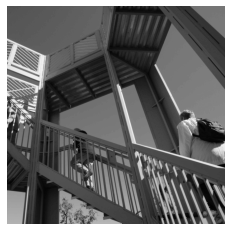

In [10]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

Podemos ver que esta es una imagen de una escalera. Hay muchas características aquí con las que podemos jugar para ver si podemos aislarlas, por ejemplo, hay líneas verticales fuertes.

La imagen se almacena como una matriz numpy, por lo que podemos crear la imagen transformada simplemente copiando esa matriz. También obtengamos las dimensiones de la imagen para que podamos recorrerla más tarde.

In [11]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

Podemos crear un filtro como un array de 3x3

In [12]:
# Este filtro marca los bordes 
# Crea una convolución que procesa los bordes marcados y líneas rectas

# Experimenta con diferentes valores para ver efectos graciosos.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# Un par de ejemplos más ...
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# Si todos los dígitos del filtro no suman 0 o no suman 1, 
# probablemente deberías repesarlos para que sumen 0 o 1, 
# por ejemplo, si tus dígitos del filtro son 1,1,1 1,2,1 1,1,1, que suman 10
# dberías multiplicarlos por un peso de 0.1 para normalizarlos
weight  = 1

Ahora vamos a crear una convolución. Iteramos sobre la imagen, dejando un margen de 1 píxel, y multiplicamos cada uno de los vecinos del píxel actual por el valor definido en el filtro.

es decir, el vecino del píxel actual arriba y a la izquierda se multiplicará por el elemento superior izquierdo en el filtro, etc., etc. Luego multiplicaremos el resultado por el peso y luego nos aseguraremos de que el resultado esté en el rango 0-255

Finalmente cargaremos el nuevo valor en la imagen transformada. GUARDA ESTE CÓDIGO PARA EL EJERCICIO!

In [13]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

Volvemos a mostrar la imagen para ver el efecto de la convolución!

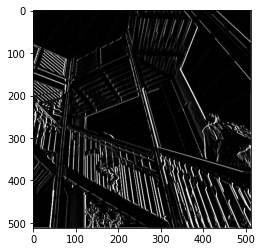

In [14]:
# Mostrar la imagen. Fíjate en el tamaño de los ejes -- son 512x512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

Fíjate en los valores del filtro y su impacto en la imagen: Experimenta con cada uno de ellos!

Utilizando -1,0,1,-2,0,2,-1,0,1 nos da un potente conjunto de líneas verticales:

![image.png](attachment:image.png)

y utilizando -1, -2, -1, 0, 0, 0, 1, 2, 1 nos da líneas horizontales:

![image-2.png](attachment:image-2.png)

### <span style="color:red">Realiza el ejercicio 1 del documento Word.</span>

In [15]:
# Ejercicio 1 a 

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
values=[]
img1 = cv2.imread('./foto5.jpg', 0)
img2 = cv2.imread('./foto3.jpeg', 0)
img3 = cv2.imread('./foto4.jpg', 0)
img4 = cv2.imread('./foto1.jpeg', 0)
img5 = cv2.imread('./foto2.jpeg', 0)
values.append(img1)
values.append(img2)
values.append(img3)
values.append(img4)
values.append(img5)
'''
img1.resize([512,512], refcheck=False)
img2.resize([512,512], refcheck=False)
img3.resize([512,512], refcheck=False)
img4.resize([512,512], refcheck=False)
img5.resize([512,512], refcheck=False)
'''

'\nimg1.resize([512,512], refcheck=False)\nimg2.resize([512,512], refcheck=False)\nimg3.resize([512,512], refcheck=False)\nimg4.resize([512,512], refcheck=False)\nimg5.resize([512,512], refcheck=False)\n'

In [17]:
filter_prewitt_x = [ [-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]
filter_prewitt_y = [ [1, 1, 1], [0, 0, 0], [-1, -1, -1]]
filter_sobel_x = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
filter_sobel_y = [ [1, 2, 1], [0, 0, 0], [-1, -2, -1]]
filter_menos_media = [ [1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]]
filter_laplace = [ [0, -1, 0], [-1, 4, -1], [0, -1, 0]]
filter_laplaciano_gaussiano = [ [0, -1, 0], [-1, 8, -1], [0, -1, 0]]
filter_gaussiano_barroso = [ [1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]]

In [18]:
# Filtros de Robinson Compass
filter_n = [[1, 1, 1], [0, 0, 0], [-1, -1, -1]] # Norte
filter_ne = [[0, 1, 1], [-1, 0, 1], [-1, -1, 0]] # Norte-Este
filter_e = [[-1, -1, -1], [0, 0, 0], [1, 1, 1]] # Este
filter_se = [[-1, -1, 0], [-1, 0, 1], [0, 1, 1]] # Sur-Este
filter_s = [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]] # Sur
filter_sw = [[0, -1, -1], [1, 0, -1], [1, 1, 0]] # Sur-Oeste
filter_w = [[1, 1, 1], [0, 0, 0], [-1, -1, -1]] # Oeste
filter_nw = [[1, 1, 0], [1, 0, -1], [0, -1, -1]] # Norte-Oeste

In [19]:
filtros = np.array([["Filtro Prewitt X", filter_prewitt_x], 
                    ["Filtro Prewitt Y", filter_prewitt_y], 
                    ["Filtro Sobel X", filter_sobel_x],
                    ["Filtro Sobel Y", filter_sobel_y], 
                    ["Filtro Menos Media", filter_menos_media], 
                    ["Filtro de Laplace", filter_laplace],
                    ["Filtro Laplaciano Gaussiano", filter_laplaciano_gaussiano], 
                    ["Filtro Gaussiano Barroso", filter_gaussiano_barroso],
                    ["Filtro Robinson Compass Norte", filter_n],
                    ["Filtro Robinson Compass Norte-Este", filter_ne],
                    ["Filtro Robinson Compass Este", filter_e],
                    ["Filtro Robinson Compass Sur-Este", filter_se],
                    ["Filtro Robinson Compass Sur", filter_s],
                    ["Filtro Robinson Compass Sur-Oeste", filter_sw],
                    ["Filtro Robinson Compass Oeste", filter_w],
                    ["Filtro Robinson Compass Norte-Oeste", filter_nw]
                  ])

<ipython-input-19-ca9c815ec298>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  filtros = np.array([["Filtro Prewitt X", filter_prewitt_x],


In [20]:
def convoluciona(imagen, filtro, title=None):
  if title == None:
    title = input("Por favor, introduzca el nombre del filtro")
  import matplotlib.pyplot as plt
  i_transformed = np.copy(imagen)
  size_x = i_transformed.shape[0]
  size_y = i_transformed.shape[1]
  filter = filtro
  weight  = 30
  im = imagen
  for x in range(1,size_x-1):
    for y in range(1,size_y-1):
        convolution = 0.0
        convolution = convolution + (imagen[x - 1, y-1] * filter[0][0])
        convolution = convolution + (imagen[x, y-1] * filter[0][1])
        convolution = convolution + (imagen[x + 1, y-1] * filter[0][2])
        convolution = convolution + (imagen[x-1, y] * filter[1][0])
        convolution = convolution + (imagen[x, y] * filter[1][1])
        convolution = convolution + (imagen[x+1, y] * filter[1][2])
        convolution = convolution + (imagen[x-1, y+1] * filter[2][0])
        convolution = convolution + (imagen[x, y+1] * filter[2][1])
        convolution = convolution + (imagen[x+1, y+1] * filter[2][2])
        convolution = convolution * weight
        if(convolution<0):
          convolution=0
        if(convolution>255):
          convolution=255
        i_transformed[x, y] = convolution

        
  fig, (ax_orig, ax_filter, ax_mag, ax_ang) = plt.subplots(1, 4, figsize=(36, 15))
  ax_orig.imshow(im, cmap='gray')
  ax_orig.set_title('Original')
  ax_orig.set_axis_off()
  ax_filter.imshow(i_transformed)
  ax_filter.set_title('Método convoluciona - '+str(title))
  ax_filter.set_axis_off()
  ax_mag.imshow(np.absolute(i_transformed), cmap='gray')
  ax_mag.set_title('Método convoluciona - Gradient magnitude - '+str(title))
  ax_mag.set_axis_off()
  ax_ang.imshow(np.angle(i_transformed), cmap='hsv') # hsv is cyclic, like angles
  ax_ang.set_title('Método convoluciona - Gradient orientation - '+str(title))
  ax_ang.set_axis_off()
  fig.show()
  #plt.title()
  #plt.imshow(np.absolute(i_transformed), cmap='hsv')
  #plt.imshow(i_transformed)
  #plt.imshow(np.absolute(i_transformed), cmap='gray')
  #plt.show()

Por favor, introduzca el nombre del filtrofilter_n


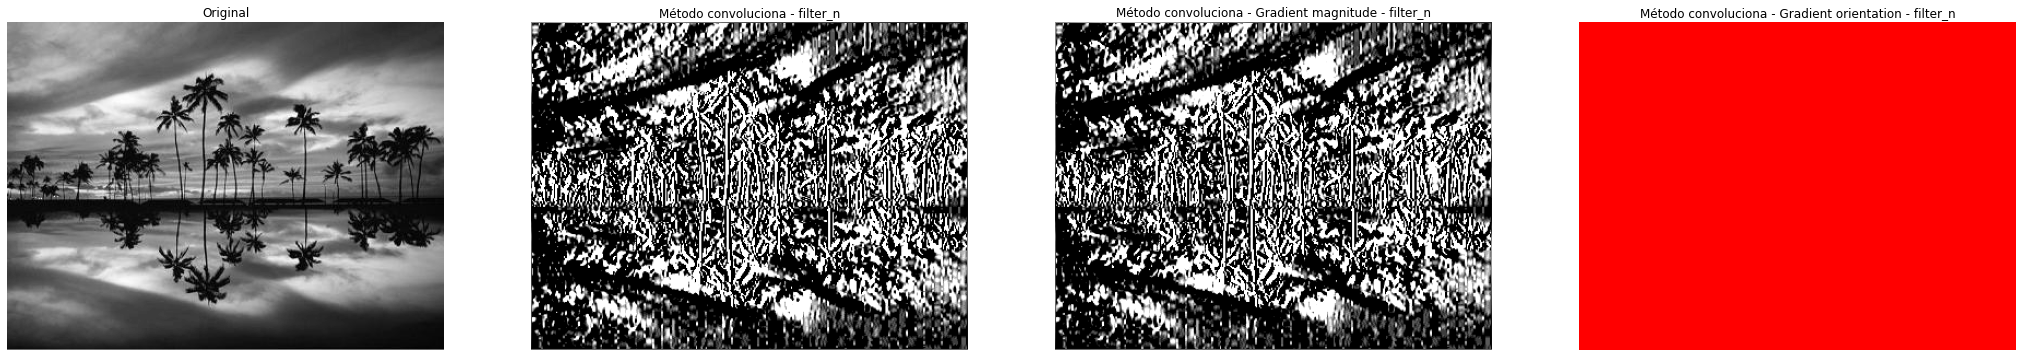

In [21]:
convoluciona(img1, filter_n)

In [22]:
# Ejercicio 1 b

<ipython-input-23-56557548f753>:6: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  ascent = misc.ascent()


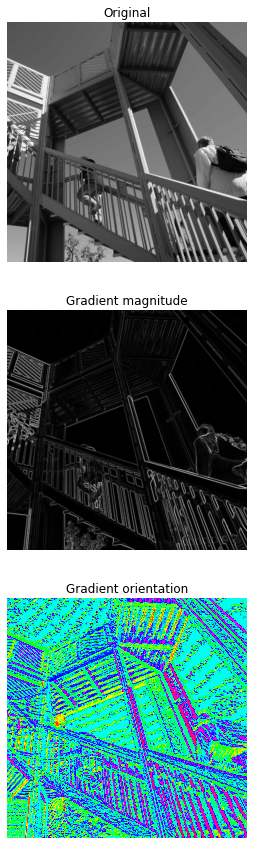

In [23]:
# Ejemplo de la documentacion de scipy
import numpy as np
import scipy
from scipy import signal
from scipy import misc
ascent = misc.ascent()
scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],
                   [-10+0j, 0+ 0j, +10 +0j],
                   [ -3+3j, 0+10j,  +3 +3j]]) # Gx + j*Gy
grad = signal.convolve2d(ascent, scharr, boundary='symm', mode='same')
import matplotlib.pyplot as plt
fig, (ax_orig, ax_mag, ax_ang) = plt.subplots(3, 1, figsize=(6, 15))
ax_orig.imshow(ascent, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_mag.imshow(np.absolute(grad), cmap='gray')
ax_mag.set_title('Gradient magnitude')
ax_mag.set_axis_off()
ax_ang.imshow(np.angle(grad), cmap='hsv') # hsv is cyclic, like angles
ax_ang.set_title('Gradient orientation')
ax_ang.set_axis_off()
fig.show()

In [24]:
# adapto los filtros y creo el método convolve2d

In [25]:
filter_prewitt_x = np.array([ [-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
filter_prewitt_y = np.array([ [1, 1, 1], [0, 0, 0], [-1, -1, -1]])
filter_sobel_x = np.array([ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
filter_sobel_y = np.array([ [1, 2, 1], [0, 0, 0], [-1, -2, -1]])
filter_menos_media = np.array([ [1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]])
filter_laplace = np.array([ [0, -1, 0], [-1, 4, -1], [0, -1, 0]])
filter_laplaciano_gaussiano = np.array([ [0, -1, 0], [-1, 8, -1], [0, -1, 0]])
filter_gaussiano_barroso = np.array([ [1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]])
# Filtros de Robinson Compass
filter_n = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]) # Norte
filter_ne = np.array([[0, 1, 1], [-1, 0, 1], [-1, -1, 0]]) # Norte-Este
filter_e = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]) # Este
filter_se = np.array([[-1, -1, 0], [-1, 0, 1], [0, 1, 1]]) # Sur-Este
filter_s = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]) # Sur
filter_sw = np.array([[0, -1, -1], [1, 0, -1], [1, 1, 0]]) # Sur-Oeste
filter_w = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]) # Oeste
filter_nw = np.array([[1, 1, 0], [1, 0, -1], [0, -1, -1]]) # Norte-Oeste

In [34]:
# Metodo convolve2d
def convolve2d(imagen, filtro, title=None):
  if title == None:
    title = input("Por favor, introduzca el nombre del filtro")
  ascent = imagen
  scharr = filtro
  grad = signal.convolve2d(ascent, scharr, boundary='symm', mode='same')

  import matplotlib.pyplot as plt
  fig, (ax_orig, ax_filter, ax_mag, ax_ang) = plt.subplots(1, 4, figsize=(36, 15))
  ax_orig.imshow(ascent, cmap='gray')
  ax_orig.set_title('Original') 
  ax_orig.set_axis_off()
  ax_filter.imshow(grad)
  ax_filter.set_title('Método convolve2d (scipy) - '+str(title))
  ax_filter.set_axis_off()
  ax_mag.imshow(np.absolute(grad), cmap='gray')
  ax_mag.set_title('Método convolve2d (scipy) - Gradient magnitude - '+str(title))
  ax_mag.set_axis_off()
  ax_ang.imshow(np.angle(grad), cmap='hsv') # hsv is cyclic, like angles
  ax_ang.set_title('Método convolve2d (scipy) - Gradient orientation - '+str(title))
  ax_ang.set_axis_off()
  fig.show()

Por favor, introduzca el nombre del filtrofilter_prewitt_x


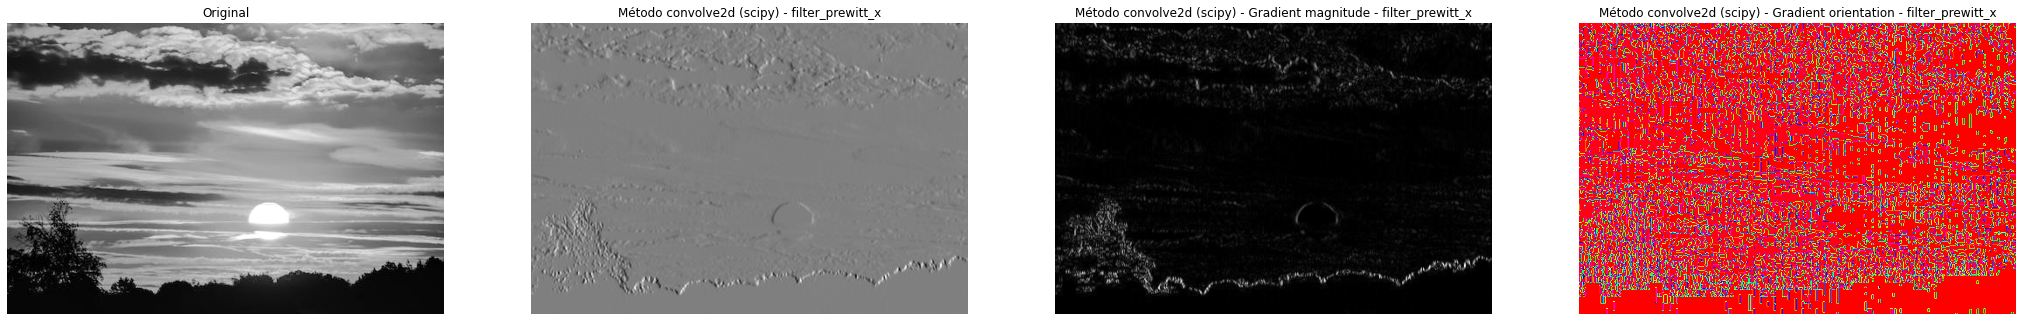

In [35]:
convolve2d(img5, filter_prewitt_x)

In [ ]:
# Ejercicio 1 c

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
print(len(values))

In [ ]:
print(len(filtros[0]))

In [ ]:
print(len(filtros))

In [ ]:
conv = []
conv2d = []

for i in range(len(values)):
  for j in range(len(filtros)):
    conv2d.append(convolve2d(values[i], filtros[j][1], filtros[j][0]))
    conv.append(convoluciona(values[i], filtros[j][1], filtros[j][0]))



## Pooling (Agrupación)

Además de usar convoluciones, la agrupación nos ayuda mucho a detectar características. El objetivo es reducir la cantidad total de información en una imagen, manteniendo las características que se detectan como presentes.

Hay varios tipos diferentes de Pooling, pero para esta práctica usaremos uno llamado agrupación MAX.

 La idea aquí es iterar sobre la imagen y observar el píxel y sus vecinos inmediatos a la derecha, debajo y justo debajo. Tomamos el más grande (de ahí el nombre de agrupación MAX) de ellos y lo cargamos en la nueva imagen. Por lo tanto, la nueva imagen tendrá 1/4 del tamaño de la anterior, con las dimensiones en X e Y reducidas a la mitad por este proceso. ¡Verás que las características se mantienen a pesar de esta compresión!

![image.png](attachment:image.png)

Este código mostrará una agrupación (2, 2). Ejecútalo para ver el resultado y verás que aunque la imagen tiene 1/4 del tamaño del original, ¡las características extraídas se mantienen!

In [ ]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    #cogemos agrupaciones de cuatro pixels
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    #los ordenamos (para quedarnos con max)
    pixels.sort(reverse=True)
    #añadimos el pixel a la nueva imagen
    newImage[int(x/2),int(y/2)] = pixels[0]

# Visualiza la imagen: observa que ahora el tamaño de los ejes es 256x256
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()      
    
    

En el siguiente notebook verás cómo agregar convoluciones a tu red neuronal Fashion MNIST para que sea más eficiente, ya que se clasificará según las características y no según los píxeles sin procesar.

### <span style="color:red">Realiza el ejercicio 2 del documento Word.</span>

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
values=[]
img1 = cv2.imread('./foto5.jpg', 0)
img2 = cv2.imread('./foto3.jpeg', 0)
img3 = cv2.imread('./foto4.jpg', 0)
img4 = cv2.imread('./foto1.jpeg', 0)
img5 = cv2.imread('./foto2.jpeg', 0)
values.append(img1)
values.append(img2)
values.append(img3)
values.append(img4)
values.append(img5)

In [ ]:
from tensorflow.core.framework.types_pb2 import DT_FLOAT
import matplotlib.pyplot as plt
import random

i_transformed3 = np.copy(img3)
z = tf.constant(i_transformed3)
z = tf.reshape(z, [1, img3.shape[0], img3.shape[1], 1])

i_transformed2 = np.copy(img2)
x = tf.constant(i_transformed2)
x = tf.reshape(x, [1, img2.shape[0], img2.shape[1], 1])
x = tf.cast(x, tf.float32)

i_transformed = np.copy(img1)
y = tf.constant(i_transformed)
y = tf.reshape(y, [1, img1.shape[0], img1.shape[1], 1])

avg_pool_2d = tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='same')
global_max_pool_2d = tf.keras.layers.GlobalMaxPooling2D(data_format=None, keepdims=True)
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')
global_avg_pool_2d = tf.keras.layers.GlobalAveragePooling2D(data_format=None, keepdims=True)

i_global_max_pool_2d = global_max_pool_2d(z)[0]
i_global_avg_pool_2d = global_avg_pool_2d(z)[0]
i_max_pool_2d = max_pool_2d(y)[0]
i_avg_pool_2d = avg_pool_2d(x)[0]

plt.gray()
plt.grid(False)

plt.imshow(img1)
plt.show()
plt.imshow(i_max_pool_2d)
plt.show()

plt.imshow(img2)
plt.show()
plt.imshow(i_avg_pool_2d)
plt.show()

plt.imshow(img3)
plt.show()
plt.imshow(i_global_avg_pool_2d)
plt.show()
plt.imshow(i_global_max_pool_2d)
plt.show()
